In [1]:
#import dataset ,y=mx+c,y=beta1x + beta \0
#simple linear regression
#HO=daily edition revenue is not dependent on sunday edition revenue
#H1=daily edition revenue is dependent on sunday edition revenue

import pandas as pd
df=pd.read_csv("/kaggle/input/newspaper/NewspaperData (1) (1).csv")

In [2]:
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
df.shape

(34, 3)

In [4]:
df.columns

Index(['Newspaper', 'daily', 'sunday'], dtype='object')

<ipython-input-5-2c374521dd38>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['daily'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='daily', ylabel='Density'>

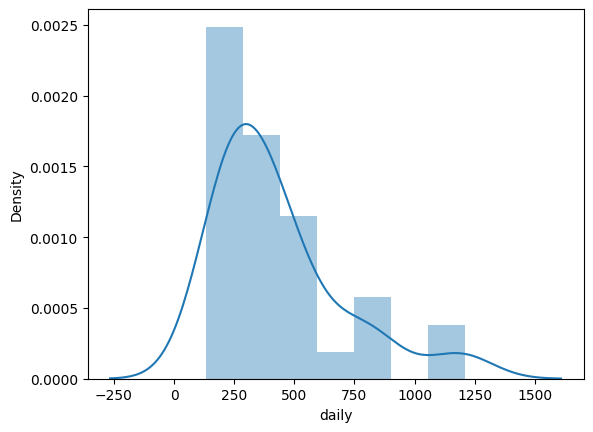

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.distplot(df['daily'])

In [6]:
z=df.corr(numeric_only=True)
z

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<ipython-input-7-ce0649bd17ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunday'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sunday', ylabel='Density'>

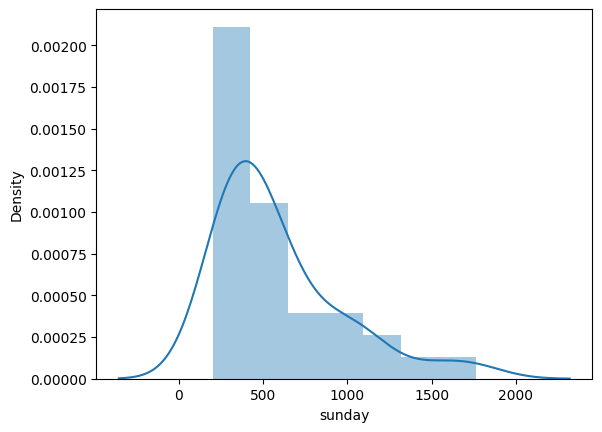

In [7]:
sns.distplot(df['sunday'])

In [8]:
model=smf.ols("sunday~daily",data=df).fit()
model.params
#y=mx+c,y=beta1 x and beta0

Intercept    13.835630
daily         1.339715
dtype: float64

In [9]:
(model.tvalues,'\n',model.pvalues)
#Intercept,bet0:tvalue: 0.386427,pvalue:7.017xe-01
#Intercept ,beta1:tvalue:18.93,pvalue= 6.016802e-19
#p value=0.00000000000006016<0.05(significance level)

(Intercept     0.386427
 daily        18.934840
 dtype: float64,
 '\n',
 Intercept    7.017382e-01
 daily        6.016802e-19
 dtype: float64)

In [10]:
print(model.tvalues)

Intercept     0.386427
daily        18.934840
dtype: float64


In [11]:
print(model.pvalues)

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [12]:
import numpy as np
from scipy import stats

In [13]:
stats.norm.cdf(0.95) #cdf=z-score,95% CI
#zscore

0.8289438736915182

<Axes: xlabel='daily', ylabel='sunday'>

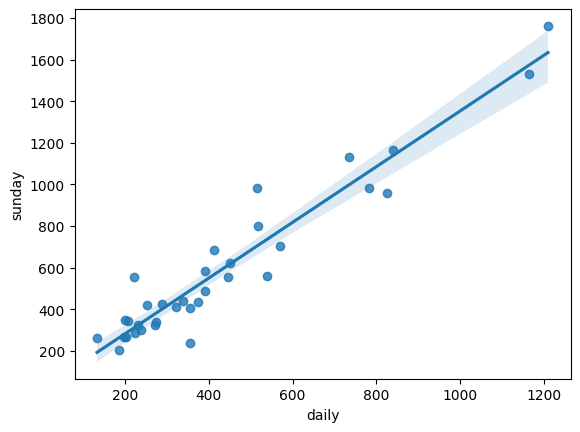

In [14]:
# Visualization of Correlation beteen x and y
sns.regplot(x=df['daily'],y=df['sunday'])  # regplot = regression plot

In [15]:
model.rsquared,model.rsquared_adj
# Bias, correction factor,75

(0.9180596895873295, 0.9154990548869336)

In [16]:
# null Hypothesis: Sunday News paper edition is in- dependent on Daily Edition
# Alternative Hypothesis:Sunday News paper edition is dependent on Daily Edition
# Intercept value which is p value is less than 0.05 (alpha level,significance level),reject nULL hYPOTHESIS
#INFER REJECT NULL HYPOTHESIS

In [17]:
stats.norm.cdf(0.95)
# z=0.82

0.8289438736915182

In [18]:
#1-0.05=0.95,5 percent uncertainity